In [1]:
using TaylorModels

In [322]:
function ldb_1_LN(f::Function, dom::Interval, order::Int)
    x0 = Interval(mid(dom))
    x = TaylorModel1(order, x0, dom)
    return f(x-x0)
end

ldb_1_LN (generic function with 1 method)

In [323]:
function ldb_3_LN(TM::TaylorModel1)
    #Compute the bound of the linear (I1) and nonlinear (Ih) parts of P+ in Dn. The minimum is
    #bounded by [M, Min] := I1 + Ih. If applicable,lower Min by the left end value and the mid-point value.
    I1 = linear_polynomial(TM.pol) + constant_term(TM.pol)
    Ih = TM.pol - I1
    bound = evaluate(Ih, TM.dom) + (evaluate(I1, TM.dom)).lo
    return bound
end

ldb_3_LN (generic function with 1 method)

In [324]:
function ldb_2_LN(TM::TaylorModel1)
    if getcoeff(linear_polynomial(TM.pol), 1) >= 0
        return TM
    else # change coordinate sign
        coeffs = TM.pol.coeffs
        coeffs_flip = similar(coeffs)
        @inbounds for (i, c) in enumerate(coeffs)
            coeffs_flip[i] = iseven(i) ? -c : c
        end
        pol_flip = Taylor1(coeffs_flip)
        TM_flip = TaylorModel1(pol_flip, TM.rem, TM.x0, TM.dom)
        return TM_flip
    end
end

ldb_2_LN (generic function with 1 method)

In [325]:
f(x) = 1 - 5x + x^3/3

f (generic function with 1 method)

In [326]:
I = 2..3; or = 4

4

In [327]:
q1 = ldb_1_LN(f,I,or)
@show q1
evaluate(q1, q1.dom)

q1 =  [1, 1] + [-5, -5] t + [0.333333, 0.333334] t³ + [0, 0]


[-10.0001, -3]

In [328]:
@show q2 = ldb_2_LN(q1)
evaluate(q2, q2.dom)

q2 = ldb_2_LN(q1) =  [1, 1] + [5, 5] t + [-0.333334, -0.333333] t³ + [0, 0]


[5, 12.0001]

In [329]:
bound = ldb_3_LN(q2)

[2, 8.33334]

In [330]:
using Plots;gr()

Plots.GRBackend()

In [331]:
x = 2: 0.1 :3
y = f.(x)

11-element Array{Float64,1}:
 -6.333333333333334
 -6.413            
 -6.450666666666665
 -6.444333333333335
 -6.392            
 -6.291666666666667
 -6.141333333333332
 -5.938999999999999
 -5.682666666666669
 -5.370333333333333
 -5.0              

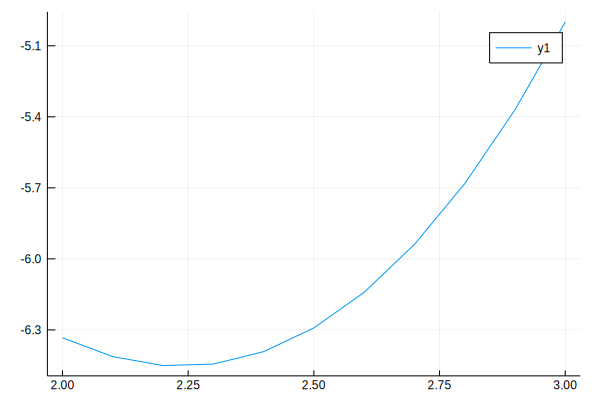

In [332]:
plot(x, y)